# Linear Regression

## 本筆記用來學習線性迴歸，包含：Ordinary Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression.

* 機器學習(Machine Learning)比較注重模型的預測能力: 在做機器學習的時候，我們比較注重於調參&嘗試各種複雜的模型(複雜的模型預測能力好，可是較不易解釋模型為何是建成那個樣)。
* 統計學習(Statistical Learning)則較注重於模型是否有足夠的解釋能力: 做統計學習時，我們比較偏向去做各種檢定，以確認模型是否有好的解釋能力(模型預測能力就不一定是優先考量了)。
* 我們這裡談的是如何以機器學習的方式做迴歸。若你想用統計學習的方式來做，請使用```statsmodels```套件: https://www.statsmodels.org/stable/index.html

---

In [1]:
import sklearn

In [3]:
dir(sklearn)

['_ASSUME_FINITE',
 '__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_contextmanager',
 '_isotonic',
 'base',
 'clone',
 'cluster',
 'config_context',
 'daal4sklearn',
 'decomposition',
 'dispatcher',
 'exceptions',
 'externals',
 'feature_selection',
 'get_config',
 'isotonic',
 'linear_model',
 'logger',
 'logging',
 'manifold',
 'metrics',
 'model_selection',
 'neighbors',
 'os',
 'preprocessing',
 'random_projection',
 're',
 'set_config',
 'setup_module',
 'svm',
 'sys',
 'tree',
 'utils',
 'warnings']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reference:
* https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch10/ch10.ipynb

# 載入房價資料，並略做EDA (Exploratory Data Analysis)

房價資料來源： https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

現在，我們來將資料載入成Pandas DataFrame:

In [5]:
# 載入數據至Pandas資料表

data_url = "https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch10/housing.data.txt"
df = pd.read_csv(data_url,delim_whitespace=True,header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head(5) # 看資料表前五行

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


畫出各欄位之間的correlation:

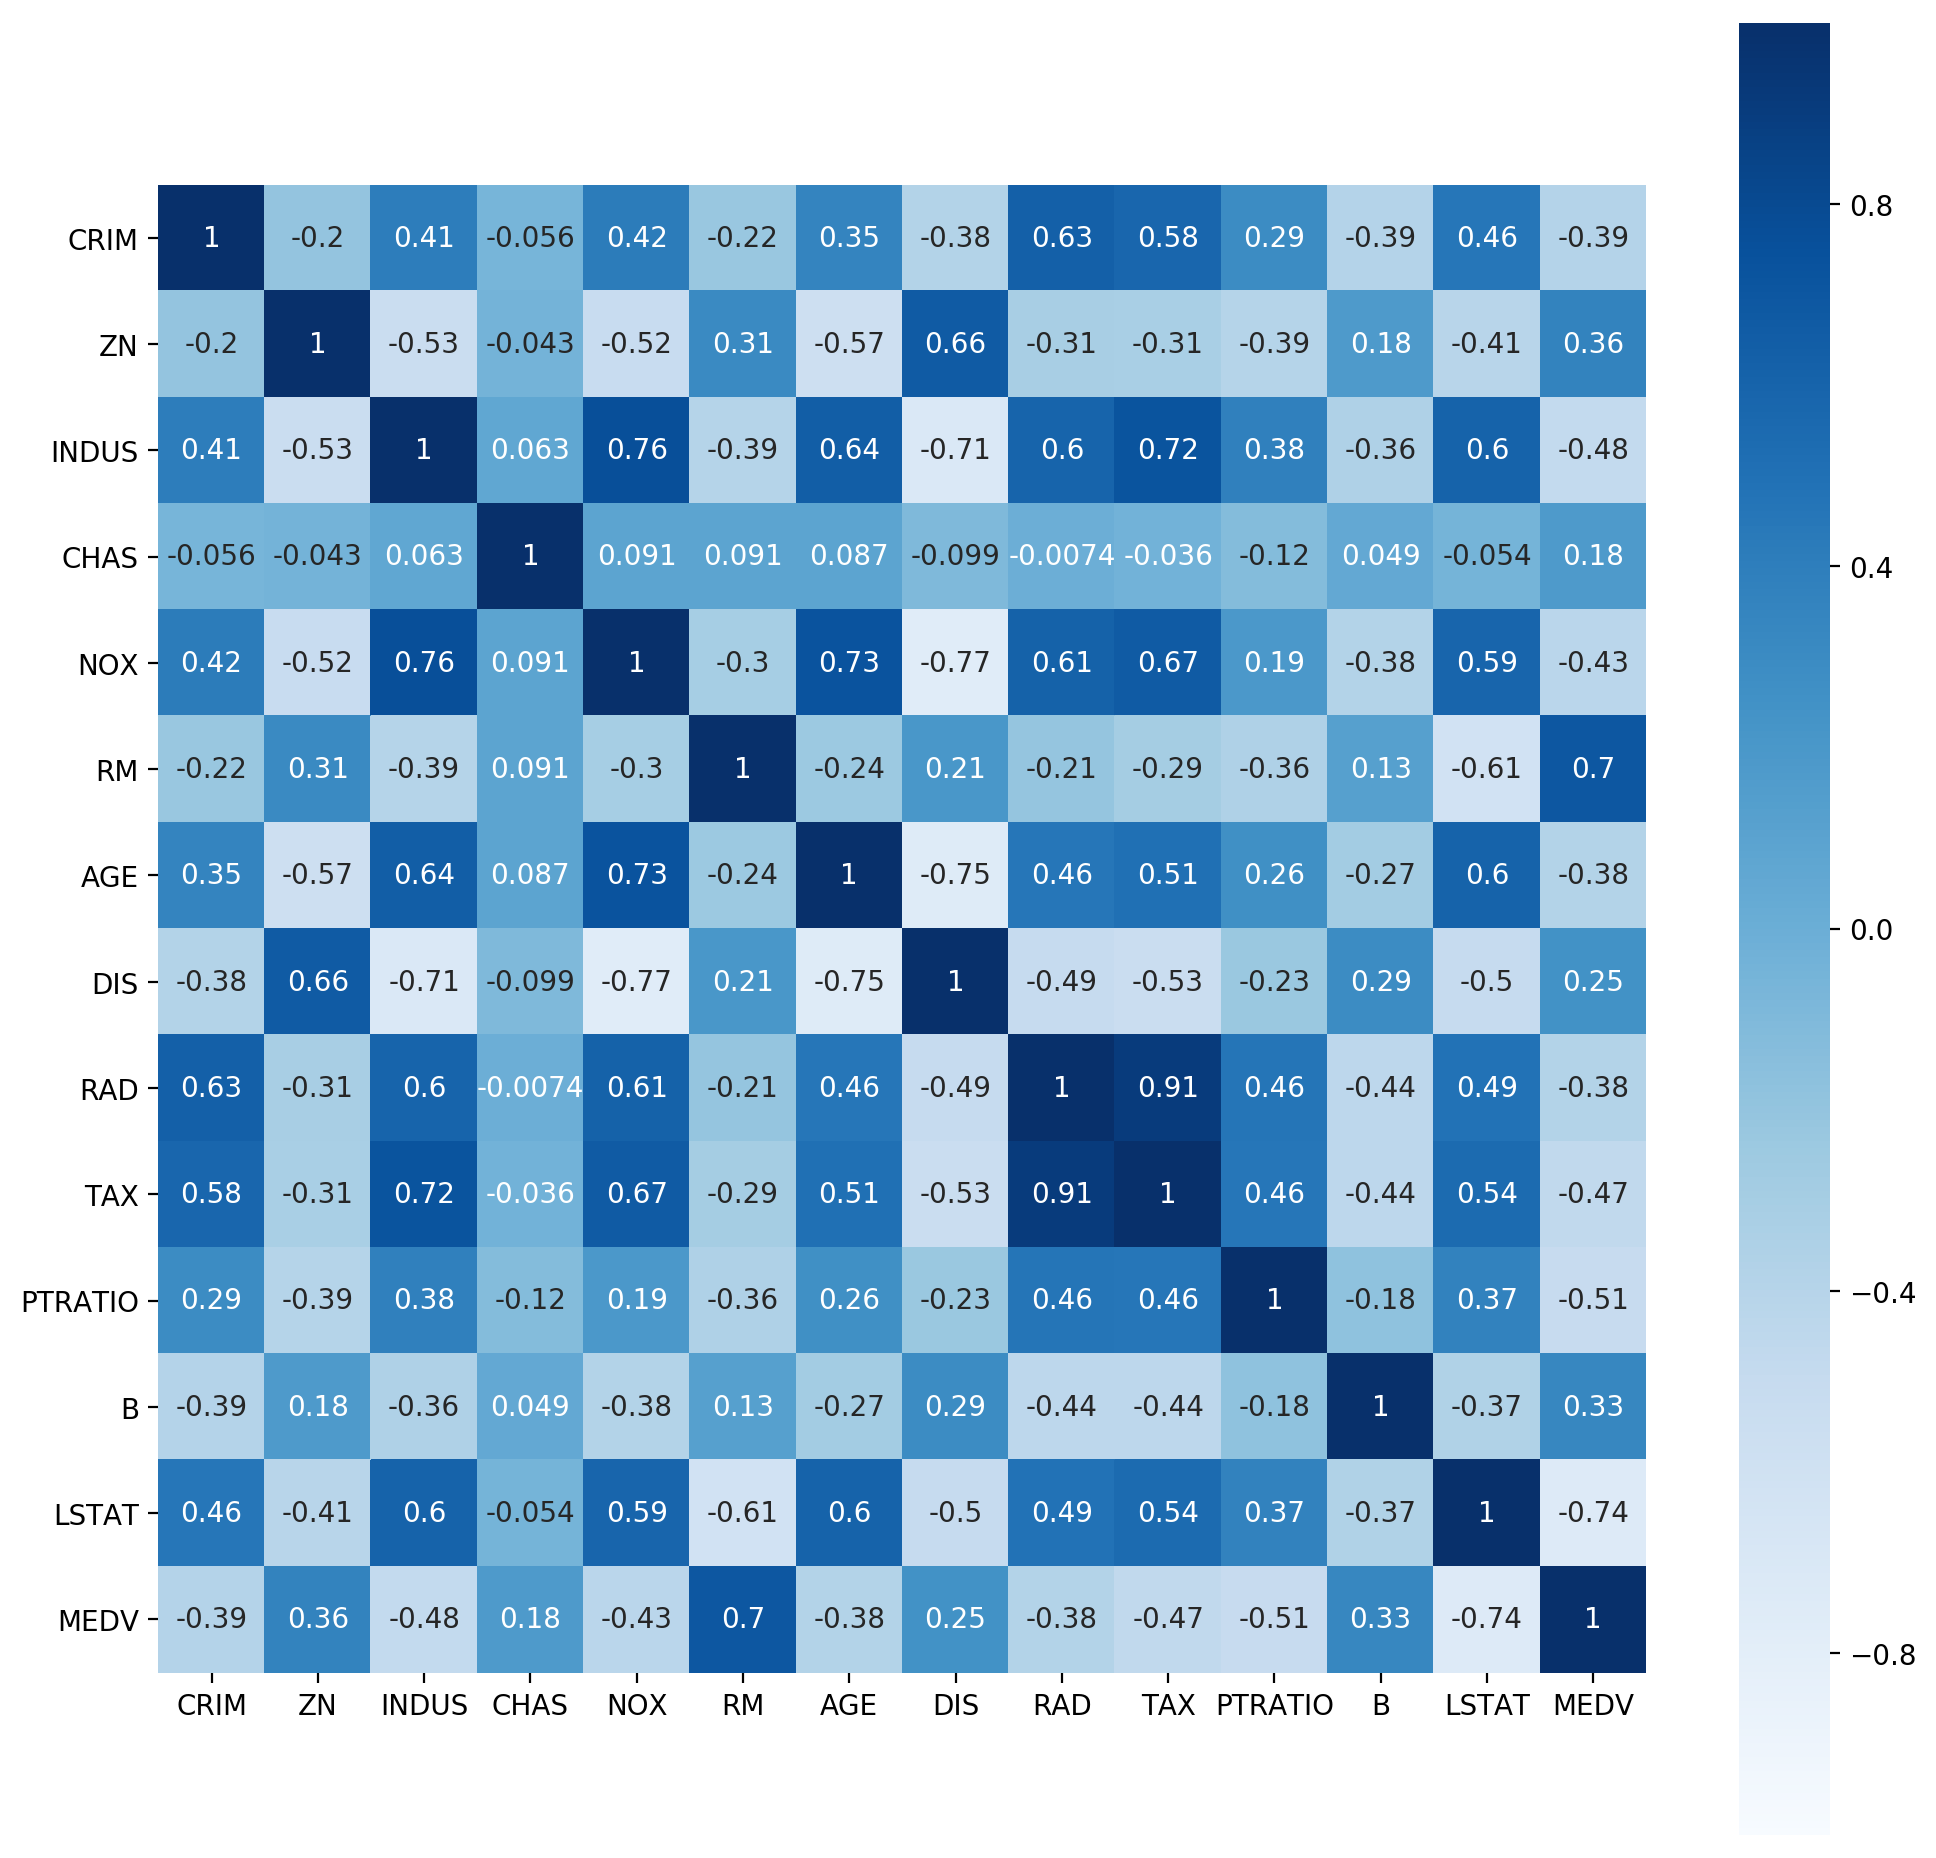

In [6]:
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap( df.corr(),cmap="Blues",
             vmin=-1,
             vmax=1,
             square=True,
             annot=True)
plt.show()

<Figure size 4000x2400 with 0 Axes>

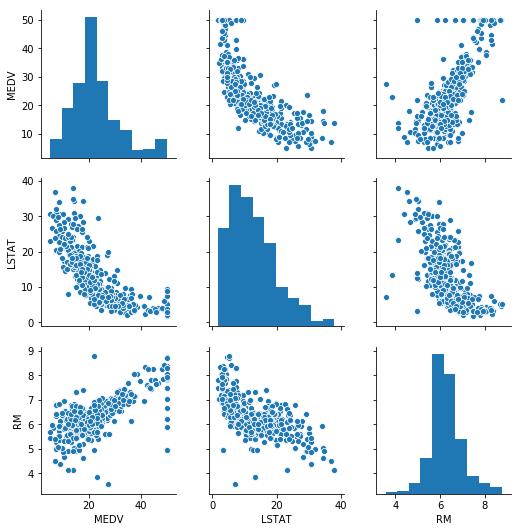

In [7]:
plt.figure(figsize=(20,12),dpi=200)

sns.pairplot(data=df,vars=["MEDV","LSTAT","RM"])
plt.show()

# 資料切成訓練和測試兩份，並且做標準化

In [167]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1].values
y = df['MEDV'].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [168]:
train_x.mean(axis=0)

array([3.06818263e+00, 1.18050847e+01, 1.08288983e+01, 5.93220339e-02,
       5.46278531e-01, 6.28639548e+00, 6.73604520e+01, 3.83460763e+00,
       9.21186441e+00, 4.02234463e+02, 1.84692090e+01, 3.62644463e+02,
       1.22787288e+01])

In [169]:
train_x.std(axis=0)

array([6.98250741e+00, 2.40303804e+01, 6.87658207e+00, 2.36226438e-01,
       1.09868581e-01, 7.11145834e-01, 2.81230401e+01, 2.07287196e+00,
       8.49411730e+00, 1.65844301e+02, 2.13314864e+00, 8.34730284e+01,
       6.86150194e+00])

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()
#scaler = scaler.fit(train_x)

print(scaler.mean_.shape)
print(scaler.var_.shape)

AttributeError: 'StandardScaler' object has no attribute 'mean_'

In [173]:
train_x.shape

(354, 13)

In [174]:
scaler = StandardScaler()
scaler = scaler.fit(train_x)

print(scaler.mean_.shape)
print(scaler.var_.shape)

(13,)
(13,)


In [175]:
assert train_x.mean(axis=0)[0] == scaler.mean_[0]

In [176]:
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [177]:
train_x.mean(axis=0)

array([-6.20344956e-16,  2.96686718e-16,  3.89017130e-15, -4.42207476e-17,
       -5.45295134e-15,  6.51738550e-15,  6.47943720e-16,  1.19419540e-15,
        7.09570507e-17,  5.92746191e-17,  2.31628903e-14,  6.48327907e-15,
       -8.26081200e-16])

In [178]:
train_x.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

$x$ ~ $N(\mu, \sigma)$

$x_{\text{normalized}} = \frac{x - \mu}{\sigma}$

$x_{\text{normalized}}$ ~ $N(0, 1)$

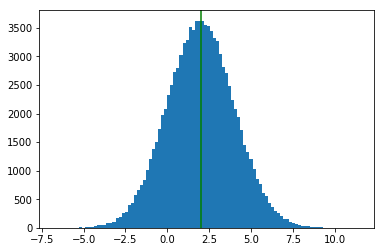

In [179]:
mean = 2
data = np.random.normal(mean,2,(100000,))

_ = plt.hist(data, bins=100)
plt.axvline(mean, color="g")

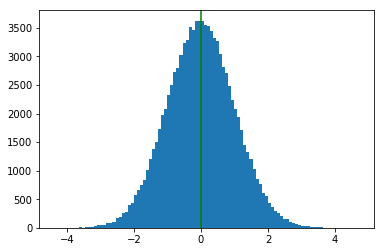

In [180]:
_ = plt.hist((data - mean)/2, bins=100)
plt.axvline(0, color="g")

---

---

99%的點會落在$[-3\sigma, +3\sigma]$ 這個範圍內

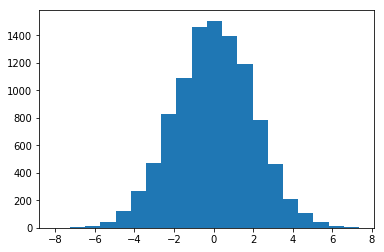

In [181]:
mean = 0
std = 2
num_samples = 10000
data = np.random.normal(mean,std,(num_samples,))

_ = plt.hist(data, bins=20)

# 線性迴歸

## 1. 普通線性迴歸

首先，試試LSTAT，看其是否能用來解釋y(和y有多少程度存在線性關係)。

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
regressor = LinearRegression(n_jobs=-1)

In [184]:
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [185]:
train_x.shape

(354, 13)

In [186]:
train_y.shape

(354,)

In [187]:
regressor = LinearRegression()
model = regressor.fit(train_x[:,[-1,]],train_y)

In [188]:
model.coef_

array([-6.58631753])

In [189]:
model.intercept_

22.87598870056496

### 以$R^2$評估迴歸結果:

In [190]:
from sklearn.metrics import r2_score

In [191]:
pred_y = model.predict(test_x[:,[-1,]])
r2_score(test_y,pred_y)

0.5780768177181552

$R^2$一般來說介於0和1之間。

$R^2$可解釋為: y有$R^2\times 100\%$的程度，是可以用x來解釋的。

---

## zip, 和star operator的使用

In [192]:
feature_names = df.columns[:-1]
feature_names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [193]:
[*range(3)]

[0, 1, 2]

In [194]:
[*zip([*range(5)],
      feature_names)]

[(0, 'CRIM'), (1, 'ZN'), (2, 'INDUS'), (3, 'CHAS'), (4, 'NOX')]

In [195]:
[*zip([*range(len(feature_names))], feature_names)]

[(0, 'CRIM'),
 (1, 'ZN'),
 (2, 'INDUS'),
 (3, 'CHAS'),
 (4, 'NOX'),
 (5, 'RM'),
 (6, 'AGE'),
 (7, 'DIS'),
 (8, 'RAD'),
 (9, 'TAX'),
 (10, 'PTRATIO'),
 (11, 'B'),
 (12, 'LSTAT')]

In [196]:
for idx,feature_name in enumerate(feature_names):
    if "RM" in feature_name:
        print(idx)

5


In [197]:
train_x.shape

(354, 13)

In [216]:
np.zeros(6).reshape((-1,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

## 練習：選RM來做迴歸，並計算出R^2

##### 建模

In [210]:
feat_rm = train_x[:,5]
feat_rm = feat_rm.reshape(354,1)
# feat_rm = train_x[:,5]

# np.expand_dims(feat_rm, axis=0)

regressor = LinearRegression()
model = regressor.fit(feat_rm, train_y)

##### 以test data評估模型好壞

In [212]:
feat_rm = test_x[:,5]
feat_rm = feat_rm.reshape(-1,1)

pred_y = model.predict(feat_rm)
r2_score(test_y, pred_y)

0.51058150416764

## 練習：選所有feature來做迴歸，並計算出R^2

##### 建模

In [221]:
regressor = LinearRegression()
model = regressor.fit(train_x, train_y)

##### 以test data評估模型好壞

In [222]:
pred_y = model.predict(test_x)
r2_score(test_y, pred_y)

0.7729058892566765

## 練習：選所有feature(除去可能有共線性的feature)來做迴歸，並計算出R^2

In [223]:
# 之後用PCA做做看
#
# regressor = LinearRegression()
# model = regressor.fit(...)

---

---

## 練習: 一般來說，離群值會讓模型學得比較不好。試著去掉離群值，然後再訓練一次模型，看$R^2$有沒有變好。

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f41008a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f41010390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f41008940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f41010be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f41019048>],
 'means': []}

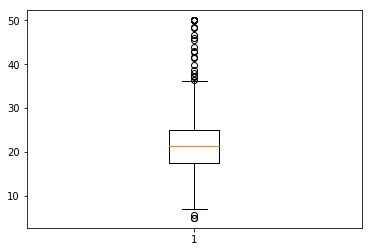

In [224]:
plt.boxplot(train_y)

In [300]:
median = np.percentile(train_y, 50.)
assert median == np.median(train_y)
lower = np.percentile(train_y, 25.)
upper = np.percentile(train_y, 75.)

print(lower, median, upper)

delta = 22
lower = lower - delta
upper = upper + delta

17.5 21.4 25.075000000000003


In [301]:
train_y_filtered = train_y[(train_y > lower) & (train_y < upper)]

In [302]:
train_y_filtered.min(), train_y_filtered.max(), train_y_filtered.shape

(5.0, 46.7, (340,))

In [303]:
train_x_filtered = train_x[(train_y > lower) & (train_y < upper)]

In [304]:
train_x_filtered.shape

(340, 13)

##### 建模

In [305]:
feat_rm = train_x_filtered[:,:]
# feat_rm = feat_rm.reshape(-1,1)
# feat_rm = train_x[:,5]

# np.expand_dims(feat_rm, axis=0)

regressor = LinearRegression()
model = regressor.fit(feat_rm, train_y_filtered)

##### 以test data評估模型好壞

In [306]:
feat_rm = test_x[:,:]
# feat_rm = feat_rm.reshape(-1,1)

pred_y = model.predict(feat_rm)
r2_score(test_y, pred_y)

0.7670906811918169

---

## 2. 多項式迴歸

In [309]:
x0 = np.zeros(3)
x0

array([0., 0., 0.])

In [310]:
x1 = np.ones(3)
x1

array([1., 1., 1.])

In [311]:
np.hstack([x0, x1])

array([0., 0., 0., 1., 1., 1.])

In [312]:
np.vstack([x0, x1])

array([[0., 0., 0.],
       [1., 1., 1.]])

$y \sim \alpha~x_{LSTAT} + \beta~x_{LSTAT}^2+\gamma$

In [313]:
train_lstat_and_square = np.hstack([train_x[:,[-1,]],
                                    train_x[:,[-1,]]**2])
test_lstat_and_square = np.hstack([test_x[:,[-1,]],
                                   test_x[:,[-1,]]**2])

In [319]:
# np.concatenate([train_x[:,[-1,]],
#                 train_x[:,[-1,]]**2], axis=1).shape

In [320]:
regressor = LinearRegression()
model = regressor.fit(train_lstat_and_square,train_y)

In [321]:
pred_y = model.predict(test_lstat_and_square)
r2_score(test_y,pred_y)

0.651700147343969

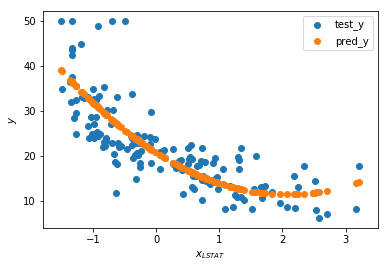

In [322]:
plt.scatter(test_x[:,-1],test_y,label="test_y")
plt.scatter(test_x[:,-1],pred_y,label="pred_y")
plt.legend()

plt.xlabel("$x_{LSTAT}$")
plt.ylabel("$y$")
plt.show()

In [323]:
tmp = pd.DataFrame(np.vstack([train_x[:,-1]**1,train_x[:,-1]**2]).T)

In [324]:
tmp.corr()

,0,1
0,1.000000,0.610265
1,0.610265,1.000000


## 3. Lasso Regression

先來做很多項的多項式回歸:

In [325]:
train_lstat_and_square = np.hstack([train_x[:,[-1,]]**j for j in range(1,10)]   # 共九項
                                  )
test_lstat_and_square = np.hstack([test_x[:,[-1,]]**j for j in range(1,10)]
                                  )

In [326]:
regresser = LinearRegression()
model = regressor.fit(train_lstat_and_square,train_y)

In [327]:
pred_y = model.predict(test_lstat_and_square)
r2_score(test_y,pred_y)

0.6107322765751619

看weights和biases:

In [328]:
model.coef_

array([-6.37749202, -4.28021756,  3.84176242,  5.90652478, -6.3412922 ,
        0.36317892,  1.37692747, -0.504537  ,  0.05298542])

In [329]:
model.intercept_

21.326963217045382

In [330]:
from sklearn.linear_model import Lasso

In [333]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [342]:
regressor = Lasso(max_iter=1000000)
regressor

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [343]:
model = regressor.fit(train_lstat_and_square,train_y)
pred_y = model.predict(test_lstat_and_square)
r2_score(test_y,pred_y)

0.5946110716301173

看weights和biases:

In [344]:
[*regressor.coef_]

[-3.3898613367574764,
 0.0,
 -0.0,
 0.0,
 -1.5313180024898687,
 1.2466316782122868,
 -0.2835253202141038,
 0.0,
 0.004287199590218328]

In [345]:
model.intercept_

21.623840841158156

## 4. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
# 練習：Ridge Regression
# ...
# ...

## 5. Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# 練習: 查一下scikit-learn API: http://scikit-learn.org/stable/index.html,
#      告訴我什麼是Elastic Net？

In [ ]:
# 練習: Elastic Net Regression
# ...
# ...